# Impact of tax credit on single women employment

- In 1994, the Earned Income Tax Credit was expanded to also include the employment of single women with children
- The United States federal earned income tax credit or earned income credit is a refundable tax credit for low to moderate-income working individuals and couples, particularly those with children
- Standard labor supply theory does indeed predict that the EITC will encourage labor force participation. This occurs because the EITC is available only to taxpayers with earned income
- Does this tax credit incentivize employment?

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# pull the data
dataset = pd.read_stata("datasets/eitc.dta")

In [ ]:
dataset.head()

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203
2,13.0,1991.0,6.4,2,0,8178.193833,0.000000,33,11,0,8.178194
3,14.0,1991.0,9.1,0,1,9369.570485,0.000000,43,11,0,9.369570
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000


Each row is an observation of a single woman.

In [ ]:
dataset.shape

(13746, 11)

In [ ]:
# creating the modelling dummy variables
dataset['is_mom'] = np.where(dataset['children'] > 0, 1, 0)
dataset['after93'] = np.where(dataset['year'] > 1993, 1, 0)
dataset['is_mom_after93'] = dataset['is_mom'] * dataset['after93']

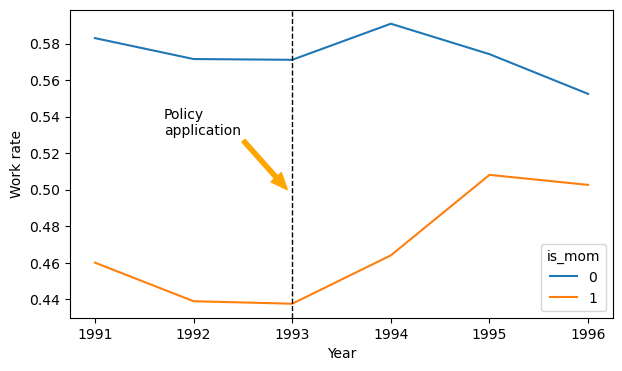

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,4))

dataset.groupby(['year', 'is_mom'])['work'].mean().unstack().plot(ax=ax)
ax.axvline(1993, color='k', linestyle='--', linewidth=1)
ax.set_xlabel('Year')
ax.set_ylabel('Work rate')
# include a arrow that indicates points from text to the line
ax.annotate('Policy\napplication', 
            xy=(1992.95, 0.5), 
            xytext=(1991.7, 0.53), 
            arrowprops={"width": 3, "headwidth": 10, "color": "orange"});


In [ ]:
dataset.head()

,state,year,urate,children,nonwhite,finc,earn,age,ed,work,unearn,is_mom,after93,is_mon_after93,is_mom_after93
0,11.0,1991.0,7.6,0,1,18714.394273,18714.394273,26,10,1,0.000000,0,0,0,0
1,12.0,1991.0,7.2,1,0,4838.568282,471.365639,22,9,1,4.367203,1,0,0,0
2,13.0,1991.0,6.4,2,0,8178.193833,0.000000,33,11,0,8.178194,1,0,0,0
3,14.0,1991.0,9.1,0,1,9369.570485,0.000000,43,11,0,9.369570,0,0,0,0
4,15.0,1991.0,8.6,3,1,14706.607930,14706.607930,23,7,1,0.000000,1,0,0,0


# DiD by aggregation

In [ ]:
dataset.groupby(['is_mom', 'after93'])['work'].mean().unstack()

after93,0,1
is_mom,,
0,0.575460,0.573386
1,0.445962,0.490761


- work(is mom after 93) - work(is_mom before 93) = 0.49 - 0.45 = 0.4
- work(not mom after 93) - work(not mom before 93) = 0.57 - 0.58 = -0.1
- DiD = 0.4 - (-0.1) = 0.4 + 0.1 = 0.5
- DiD = 0.5

The employmet rate of mom's that work has increased by 0.5 after the policy application.

# DiD by Logistic Regression

In [ ]:
X = dataset[['is_mom', 'after93', 'is_mom_after93']]
y = dataset['work'].values

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)
model1 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.686491
         Iterations 4


In [ ]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                13746
Model:                          Logit   Df Residuals:                    13742
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 Dec 2022   Pseudo R-squ.:                0.009118
Time:                        20:39:39   Log-Likelihood:                -9436.5
converged:                       True   LL-Null:                       -9523.3
Covariance Type:            nonrobust   LLR p-value:                 2.058e-37
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3042      0.036      8.443      0.000       0.234       0.375
is_mom            -0.5212      0.047    -10.985      0.000      -0.614      -0.428
after93           -0.0085      0.053

It is not the same because it is a Logistic Regression!